In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 30 mins

In [ ]:
df_qi = pd.read_excel('LD50 Data 30 mins.xlsx', sheet_name=0, usecols="A,L,M,O,P")

In [ ]:
print(df_qi)

       Well  ObjectAvgIntenCh1  ObjectVarIntenCh1  AvgIntenCh2  VarIntenCh2
0        A1        4622.515541         418.012483    16.725616    42.773310
1        A1        4838.568027         566.599692     3.039966     8.030613
2        A1        5619.319955         943.248989     3.352285     8.265567
3        A1        4671.108453         436.006931     4.704944     9.985030
4        A1        5590.316812         999.448639     3.140914    11.538863
...     ...                ...                ...          ...          ...
648494  H12        5246.005277         232.195987    11.868074    18.044756
648495  H12        6227.236301         816.981363    36.791096    61.143030
648496  H12        7257.618802         979.003044     9.574380    18.310472
648497  H12        6450.020161         958.424876     4.513441    10.868462
648498  H12        5675.902632         496.530853     4.921053    11.569200

[648499 rows x 5 columns]


In [ ]:
# Calculate Percentage of Cells Dead per Field
df_qi["% Cells Dead"]= df_qi["AvgIntenCh2"]/df_qi["ObjectAvgIntenCh1"] * 100

In [ ]:
# Groupd Data by Well
df_grouped_mean = df_qi.groupby('Well').mean().reset_index()

In [ ]:
display(df_grouped_mean)

,Well,ObjectAvgIntenCh1,ObjectVarIntenCh1,AvgIntenCh2,VarIntenCh2,% Cells Dead
0,A1,5201.438201,798.505190,264.620395,167.105718,4.462367
1,A10,5058.475246,708.916997,16.067577,19.284444,0.313290
2,A11,5193.496730,735.195114,13.276913,17.936853,0.259413
3,A12,5382.232561,748.318060,15.551924,21.234876,0.288862
4,A2,5528.453834,812.417565,13.723321,19.166380,0.254311
...,...,...,...,...,...,...
91,H5,6147.220879,918.140163,13.124778,20.319450,0.219041
92,H6,6782.624400,1114.314389,477.755902,223.709693,6.889236
93,H7,6346.547764,970.340399,14.066973,20.841830,0.228163
94,H8,6367.778600,965.176501,19.474520,24.895807,0.299009


In [ ]:
# Rows and Cols in 96-Well Plate
rows = [chr(row) for row in range(ord('A'), ord('H') + 1)]
cols = range(1,13)

In [ ]:
# Hoechst 30 Min

# Calculate Mean Hoechst per Row
rows_H_30 = []
for row in rows:
  df_1row = df_grouped_mean[df_grouped_mean['Well'].isin(f'{row}{col}' for col in range(1,13))][['ObjectAvgIntenCh1']]
  rows_H_30.append(df_1row['ObjectAvgIntenCh1'].tolist())

print(rows_H_30)

df_mean_rows_cols_30_H = pd.DataFrame(rows_H_30, index=rows, columns = cols)

df_mean_rows_cols_30_H['Mean'] = df_mean_rows_cols_30_H.mean(axis=1)
df_mean_rows_cols_30_H['Std Dev'] = df_mean_rows_cols_30_H.drop(columns=['Mean']).std(axis=1)
print()
display(df_mean_rows_cols_30_H)

[[5201.438201231781, 5058.4752456108035, 5193.496729835025, 5382.232561393215, 5528.453834409825, 5329.067512187281, 5220.326757489922, 4986.208394496963, 5133.453278488147, 6125.422347473048, 5040.040893837425, 4934.352319307201], [5478.484938670143, 4981.216940604986, 4751.858637317483, 6472.658563323758, 5662.20306241424, 5548.728370168192, 5411.092899138689, 5207.124854431427, 6029.315745095068, 5141.509029162879, 4999.286776559487, 4858.535188660086], [5904.118463272031, 5555.101173357033, 5774.579887911662, 5800.823173531255, 5239.196416935952, 5311.255814053995, 5223.230870041387, 5272.084126109073, 5030.195083430423, 6096.6017436389275, 5087.310743730205, 5144.728663561686], [5651.409670293803, 6111.148533115107, 6385.322220927884, 6169.4635078447045, 5529.3632591949645, 5407.64854631083, 5560.131484921307, 5606.117620827862, 7875.506254878267, 4663.168583045879, 5374.535286713162, 5672.933890642742], [6112.7127963603225, 5771.399423099826, 5701.229143766281, 5747.826097392919,

,1,2,3,4,5,6,7,8,9,10,11,12,Mean,Std Dev
A,5201.438201,5058.475246,5193.496730,5382.232561,5528.453834,5329.067512,5220.326757,4986.208394,5133.453278,6125.422347,5040.040894,4934.352319,5261.080673,321.383813
B,5478.484939,4981.216941,4751.858637,6472.658563,5662.203062,5548.728370,5411.092899,5207.124854,6029.315745,5141.509029,4999.286777,4858.535189,5378.501250,503.756973
C,5904.118463,5555.101173,5774.579888,5800.823174,5239.196417,5311.255814,5223.230870,5272.084126,5030.195083,6096.601744,5087.310744,5144.728664,5453.268847,358.202720
D,5651.409670,6111.148533,6385.322221,6169.463508,5529.363259,5407.648546,5560.131485,5606.117621,7875.506255,4663.168583,5374.535287,5672.933891,5833.895738,780.664048
E,6112.712796,5771.399423,5701.229144,5747.826097,5832.722741,5775.893049,5663.660147,5588.147731,5637.655845,6356.441036,5819.577972,5739.666805,5812.244399,216.251849
F,5757.809788,5778.205777,5792.482715,6277.704032,6327.335734,6043.135239,5782.342022,5694.717671,5964.767720,5635.101081,5863.300350,5801.748235,5893.220864,220.160074
G,5903.772232,5941.816272,5976.293383,6351.975089,5447.160278,5621.265842,5859.835952,5874.743810,5918.384530,6450.864598,6131.031478,6066.359732,5961.958600,275.622773
H,5834.705703,6548.070715,6960.768843,6723.401470,5847.823475,5983.755063,6055.952949,6147.220879,6782.624400,6346.547764,6367.778600,6504.018610,6341.889039,374.354142


In [ ]:
# PI 30 Min

# Calculate Mean PI per Row
rows_PI_30 = []
for row in rows:
  df_1row = df_grouped_mean[df_grouped_mean['Well'].isin(f'{row}{col}' for col in range(1,13))][['AvgIntenCh2']]
  rows_PI_30.append(df_1row['AvgIntenCh2'].tolist())

df_mean_rows_cols_30_PI = pd.DataFrame(rows_PI_30, index=rows, columns = cols)
df_mean_rows_cols_30_PI['Mean'] = df_mean_rows_cols_30_PI.mean(axis=1)
df_mean_rows_cols_30_PI['Std Dev'] = df_mean_rows_cols_30_PI.drop(columns=['Mean']).std(axis=1)
display(df_mean_rows_cols_30_PI)

,1,2,3,4,5,6,7,8,9,10,11,12,Mean,Std Dev
A,264.620395,16.067577,13.276913,15.551924,13.723321,12.685368,14.771912,16.345991,16.675371,731.259983,14.312938,15.469795,95.396791,212.729393
B,13.721575,13.213914,13.796742,872.671689,14.650949,17.139833,17.370130,14.012910,746.049556,14.929770,12.746564,14.287779,147.049284,310.543976
C,15.646618,15.497792,16.113161,14.815590,16.119254,15.334406,13.996143,15.168453,11.652660,799.587775,14.092402,16.774570,80.399902,226.489359
D,16.300099,15.193203,14.662103,13.988237,16.375714,15.576737,13.333648,16.116907,1865.482533,16.307460,13.425645,14.458242,169.268377,534.170080
E,354.087253,19.274392,14.371136,13.894435,13.938006,15.278664,14.276937,13.320510,14.939707,2987.127116,12.567657,11.739620,290.401286,854.847691
F,15.327764,17.232233,13.615759,17.867812,13.254493,13.911404,17.490871,15.126514,113.169554,14.454227,18.801749,12.970137,23.601876,28.274480
G,19.514451,13.706587,16.554182,13.315007,19.558579,17.509947,13.992948,13.305221,15.583001,501.233703,15.295168,16.438900,56.333974,140.123977
H,17.647966,20.493331,16.251545,149.892386,17.441731,14.706684,15.034973,13.124778,477.755902,14.066973,19.474520,14.683495,65.881190,135.291452


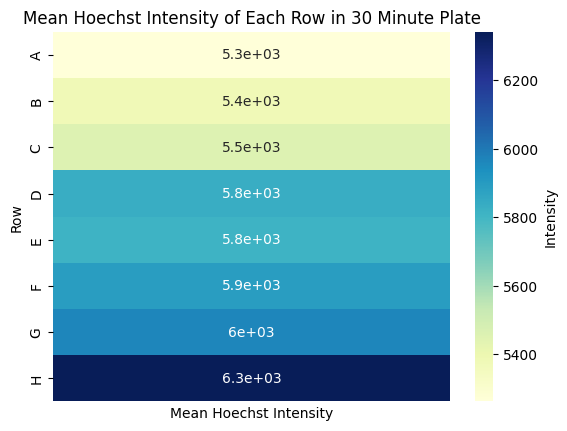

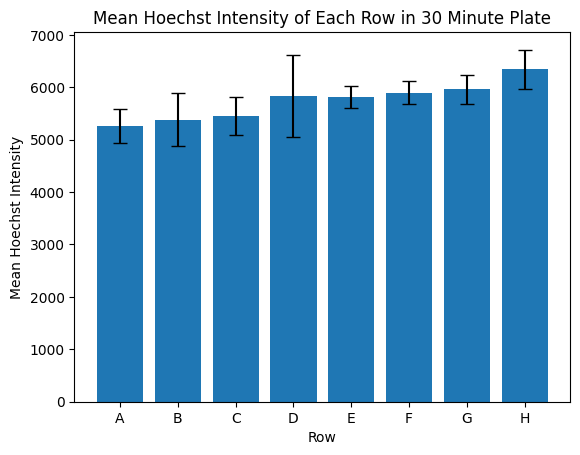

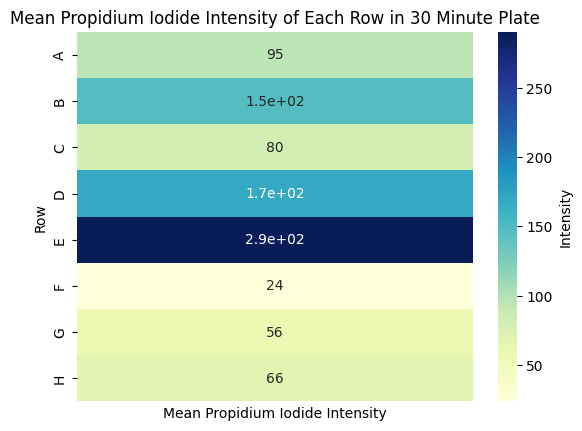

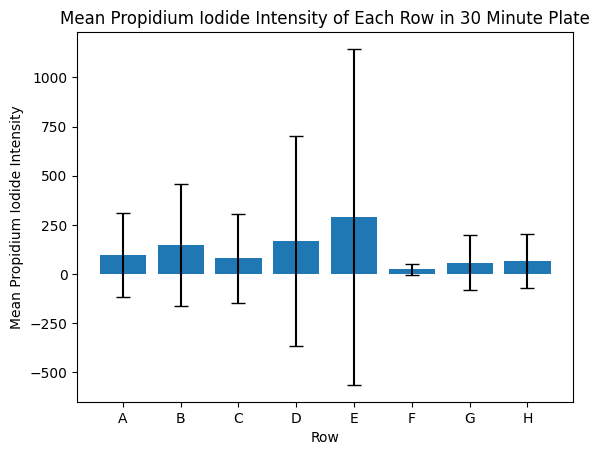

In [ ]:
# 30 min Hoechst Heat Map
sns.heatmap(df_mean_rows_cols_30_H[['Mean']], annot=True, cmap="YlGnBu", cbar=True, cbar_kws={'label':'Intensity'}, xticklabels=False)

plt.title("Mean Hoechst Intensity of Each Row in 30 Minute Plate")
plt.xlabel("Mean Hoechst Intensity")
plt.ylabel("Row")
plt.show()

# 30 min Hoechst Bar Plot
plt.bar(df_mean_rows_cols_30_H.index, df_mean_rows_cols_30_H['Mean'], yerr=df_mean_rows_cols_30_H['Std Dev'], capsize=5)

plt.title("Mean Hoechst Intensity of Each Row in 30 Minute Plate")
plt.xlabel("Row")
plt.ylabel('Mean Hoechst Intensity')
plt.show()

# 30 min PI Heat Map
sns.heatmap(df_mean_rows_cols_30_PI[['Mean']], annot=True, cmap="YlGnBu", cbar=True, cbar_kws={'label':'Intensity'}, xticklabels=False)

plt.title("Mean Propidium Iodide Intensity of Each Row in 30 Minute Plate")
plt.xlabel("Mean Propidium Iodide Intensity")
plt.ylabel("Row")
plt.show()

# 30 min PI Bar Plot
plt.bar(df_mean_rows_cols_30_PI.index, df_mean_rows_cols_30_PI['Mean'], yerr=df_mean_rows_cols_30_PI['Std Dev'], capsize=5)

plt.title("Mean Propidium Iodide Intensity of Each Row in 30 Minute Plate")
plt.xlabel("Row")
plt.ylabel('Mean Propidium Iodide Intensity')
plt.show()

In [ ]:
# ANOVA of 30 min Hoechst Intensities
f_stat, p_value = stats.f_oneway(*rows_H_30)

print('Hoechst:')
print(f"P-value: {p_value}")
print()

# ANOVA of 30 min PI Intensities
f_stat, p_value = stats.f_oneway(*rows_PI_30)

print('PI:')
print(f"P-value: {p_value}")

Hoescht:
P-value: 4.4627218362740586e-08

PI:
P-value: 0.7900882788537289


In [ ]:
# Venom columns
venom_columns = list(range(2, 6)) + list(range(8, 12))
venom1_index = [f"{letter}{number}" for letter in "ACEG" for number in venom_columns]
venom2_index = [f"{letter}{number}" for letter in "BDFH" for number in venom_columns]

In [ ]:
df_venom1 = df_grouped_mean[df_grouped_mean['Well'].isin(venom1_index)][['Well', '% Cells Dead']]

df_venom2 = df_grouped_mean[df_grouped_mean['Well'].isin(venom2_index)][['Well', '% Cells Dead']]

In [ ]:
# Calculate Mean Percentage of Cells Dead per Venom 1 Dosage
col_mean_venom1 = []
for column in venom_columns:
  df_col = df_venom1[df_venom1['Well'].isin(["A"+str(column),"C"+str(13-column),"E"+str(column),"G"+str(13-column)])]
  col_mean_venom1.append(df_col['% Cells Dead'].mean())

# Calculate Mean Percentage of Cells Dead per Venom 2 Dosage
col_mean_venom2 = []
for column in venom_columns:
  df_col = df_venom2[df_venom2['Well'].isin(["B"+str(column),"D"+str(13-column),"F"+str(column),"H"+str(13-column)])]
  col_mean_venom2.append(df_col['% Cells Dead'].mean())

In [ ]:
# Control Wells
pos_control = ['A1', 'A7', 'B6', 'B12', 'C1', 'C7', 'D6', 'D12', 'E1', 'E7', 'F6', 'F12', 'G1', 'G7', 'H6', 'H12']
neg_control = ['A6', 'A12', 'B1', 'B7', 'C6', 'C12', 'D1', 'D7', 'E6', 'E12', 'F1', 'F7', 'G6', 'G12', 'H1', 'H7']

In [ ]:
# Positive Control Mean
df_pos_30 = df_grouped_mean[df_grouped_mean['Well'].isin(pos_control)][['% Cells Dead']]
cells_dead_pos_30 = df_pos_30['% Cells Dead'].mean()

# Negative Control Mean
df_neg_30 = df_grouped_mean[df_grouped_mean['Well'].isin(neg_control)][['% Cells Dead']]
cells_dead_neg_30 = df_neg_30['% Cells Dead'].mean()

In [ ]:
# Dosages of Venom 1
venom1_initial_value = 5.38
dosage_venom1 = [venom1_initial_value / (5 ** i) for i in range(8)]
print(dosage_venom1)

# Dosages of Venom 2
venom2_initial_value = 0.16
dosage_venom2 = [venom2_initial_value / (5 ** i) for i in range(8)]
print(dosage_venom2)

[5.38, 1.076, 0.2152, 0.04304, 0.008608, 0.0017216, 0.00034432, 6.8864e-05]
[0.16, 0.032, 0.0064, 0.00128, 0.000256, 5.12e-05, 1.024e-05, 2.048e-06]


In [ ]:
df_venom1_plot = pd.DataFrame({'X': dosage_venom1, 'Y': col_mean_venom1})
df_venom1_plot['X'] = df_venom1_plot['X'][::-1].values
df_venom1_plot['Y'] = df_venom1_plot['Y'][::-1].values

df_venom2_plot = pd.DataFrame({'X': dosage_venom2, 'Y': col_mean_venom2})
df_venom2_plot['X'] = df_venom2_plot['X'][::-1].values
df_venom2_plot['Y'] = df_venom2_plot['Y'][::-1].values

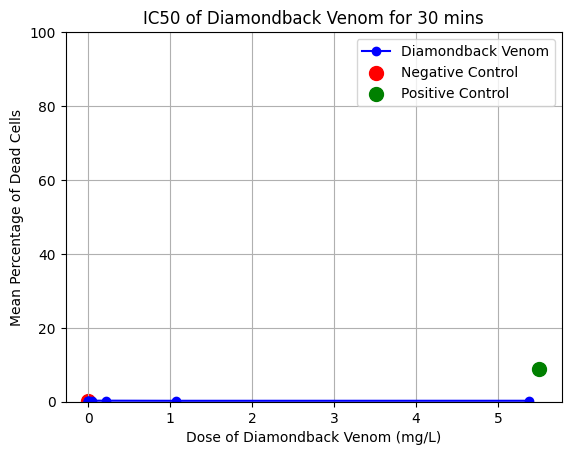

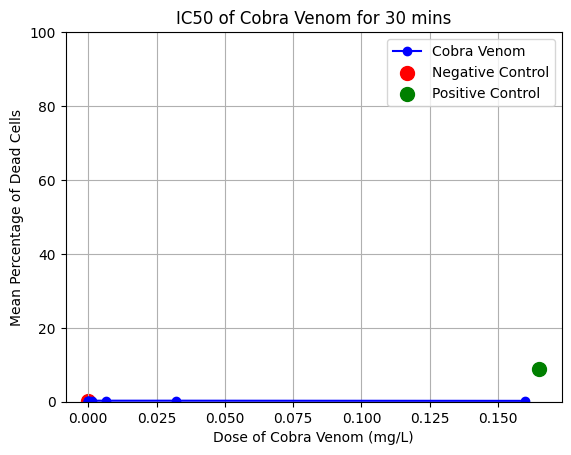

In [ ]:
# IC50 of Venom 1 at 30 mins
df_venom1_plot.plot(x='X', y='Y', marker='o', color='blue', label='Diamondback Venom')

plt.title('IC50 of Diamondback Venom for 30 mins')
plt.xlabel('Dose of Diamondback Venom (mg/L)')
plt.ylabel('Mean Percentage of Dead Cells')
plt.ylim(0,100)
plt.scatter(0, cells_dead_neg_30, color='red', s=100, label='Negative Control')
plt.scatter(5.5, cells_dead_pos_30, color='green', s=100, label='Positive Control')
plt.legend()
plt.grid()
plt.show()

# IC50 of Venom 2 at 30 mins
df_venom2_plot.plot(x='X', y='Y', marker='o', color='blue', label='Cobra Venom')

plt.title('IC50 of Cobra Venom for 30 mins')
plt.xlabel('Dose of Cobra Venom (mg/L)')
plt.ylabel('Mean Percentage of Dead Cells')
plt.scatter(0, cells_dead_neg_30, color='red', s=100, label='Negative Control')
plt.scatter(0.165, cells_dead_pos_30, color='green', s=100, label='Positive Control')
plt.ylim(0,100)
plt.legend()
plt.grid()
plt.show()

## 48 hrs

In [ ]:
df_qi2 = pd.read_excel('LD50 Data 48 hrs.xlsx', sheet_name=0, usecols="A,L,M,O,P")

In [ ]:
# Calculate Percentage of Cells Dead per Field
df_qi2["% Cells Dead"]= df_qi2["AvgIntenCh2"]/df_qi2["ObjectAvgIntenCh1"] * 100

In [ ]:
# Grouped Data by Well
df_grouped_mean2 = df_qi2.groupby('Well').mean().reset_index()

In [ ]:
# Hoechst 48 Hr

# Calculate Mean Hoechst per Row
rows_H_48 = []
for row in rows:
  df_1row = df_grouped_mean2[df_grouped_mean2['Well'].isin(f'{row}{col}' for col in range(1,13))][['ObjectAvgIntenCh1']]
  rows_H_48.append(df_1row['ObjectAvgIntenCh1'].tolist())

print(rows_H_48)

df_mean_rows_cols_48_H = pd.DataFrame(rows_H_48, index=rows, columns = cols)

df_mean_rows_cols_48_H['Mean'] = df_mean_rows_cols_48_H.mean(axis=1)
df_mean_rows_cols_48_H['Std Dev'] = df_mean_rows_cols_48_H.drop(columns=['Mean']).std(axis=1)
print()
display(df_mean_rows_cols_48_H)

[[4759.212280668924, 5150.794069081639, 5196.256886183647, 5343.919518609181, 4668.944649795384, 4721.038559030042, 5022.88120487764, 5028.88803715491, 5273.820353985807, 6131.785917971934, 4791.409126307896, 4794.590221348263], [5771.572269567112, 5167.849558658731, 5059.243081849964, 6822.201060647497, 5049.865971154915, 4970.843969746325, 5258.736318909686, 5242.959433886504, 6755.782852670364, 5151.9317143539465, 5492.66249552794, 5094.804805217784], [7269.822506385295, 6141.204949508792, 6287.91734545818, 5466.791057927563, 4554.085816524774, 5429.372314193871, 5643.658493725868, 5939.833260004306, 6174.473673114486, 5968.42401694212, 6189.377591222219], [6185.5097741532, 6197.886967713532, 6420.490218631478, 7695.551632234583, 5858.875258329811, 6131.7138407417915, 6592.563454437498, 6114.400777996109, 7687.10395622819, 6347.171554018317, 6584.908027551527, 6281.118531463404], [7936.649381577093, 7262.670130465119, 6983.881081068431, 7376.858388920518, 6384.150335738933, 6661.930

,1,2,3,4,5,6,7,8,9,10,11,12,Mean,Std Dev
A,4759.212281,5150.794069,5196.256886,5343.919519,4668.944650,4721.038559,5022.881205,5028.888037,5273.820354,6131.785918,4791.409126,4794.590221,5073.628402,404.840794
B,5771.572270,5167.849559,5059.243082,6822.201061,5049.865971,4970.843970,5258.736319,5242.959434,6755.782853,5151.931714,5492.662496,5094.804805,5486.537794,646.224476
C,7269.822506,6141.204950,6287.917345,5466.791058,4554.085817,5429.372314,5643.658494,5939.833260,6174.473673,5968.424017,6189.377591,NaN,5914.996457,673.372085
D,6185.509774,6197.886968,6420.490219,7695.551632,5858.875258,6131.713841,6592.563454,6114.400778,7687.103956,6347.171554,6584.908028,6281.118531,6508.107833,589.041922
E,7936.649382,7262.670130,6983.881081,7376.858389,6384.150336,6661.930288,6316.849559,7165.017495,6549.707799,7867.572570,7059.235425,7003.270296,7047.316062,522.944114
F,6716.184445,7047.466049,7306.864232,9308.705583,6862.180273,7105.766667,6750.693535,7090.885838,8610.444712,6966.283503,7270.226163,7142.947866,7348.220739,788.595949
G,8383.838894,8039.598501,8296.879860,8397.415389,6252.685038,6804.481231,7396.007748,7436.398498,7668.721767,8977.083745,8240.008163,8242.655465,7844.647858,765.810149
H,7111.576962,8659.583328,8701.400059,9547.891789,7340.644075,7443.572545,8010.549825,8030.498437,9673.370302,8455.683525,8844.289326,8599.489037,8368.212434,815.237966


In [ ]:
# PI 48 Hr

# Calculate Mean PI per Row
rows_PI_48 = []
for row in rows:
  df_1row = df_grouped_mean2[df_grouped_mean2['Well'].isin(f'{row}{col}' for col in range(1,13))][['AvgIntenCh2']]
  rows_PI_48.append(df_1row['AvgIntenCh2'].tolist())

df_mean_rows_cols_48_PI = pd.DataFrame(rows_PI_48, index=rows, columns = cols)
df_mean_rows_cols_48_PI['Mean'] = df_mean_rows_cols_48_PI.mean(axis=1)
df_mean_rows_cols_48_PI['Std Dev'] = df_mean_rows_cols_48_PI.drop(columns=['Mean']).std(axis=1)
display(df_mean_rows_cols_48_PI)

,1,2,3,4,5,6,7,8,9,10,11,12,Mean,Std Dev
A,1436.657567,19.309867,17.083977,16.327864,164.769482,30.844514,20.227175,22.536015,16.665535,2448.440310,19.274653,18.878186,352.584595,774.479796
B,22.934792,17.342701,18.243985,1451.104143,16.490012,21.911154,18.129183,17.487495,4587.252567,15.852660,19.116954,16.936559,518.566850,1345.872483
C,2110.785662,23.913710,20.545098,18.634148,22.199413,23.918305,22.167657,18.283253,70.919549,20.564436,24.779682,NaN,216.064628,628.585017
D,22.918425,58.301468,30.038630,1233.103747,19.992574,17.212060,20.049671,19.931967,3940.656796,23.991896,20.038819,25.291830,452.627324,1152.025947
E,855.364043,18.751228,21.618769,21.798019,36.536872,26.716356,24.811439,25.127250,20.864431,4188.923731,20.036668,20.215815,440.063718,1204.562993
F,19.887136,20.092399,20.605497,2461.312122,26.012926,33.400848,64.584020,23.743450,2572.463231,20.882314,20.159818,22.925952,442.172476,969.467777
G,1746.282301,27.883947,30.401924,27.955495,22.191325,18.851224,18.859166,22.748262,32.988026,829.723221,38.130354,49.879066,238.824526,527.664751
H,26.060466,44.226858,38.170236,439.070358,21.444538,31.704368,24.799376,22.688852,1002.124554,29.678101,26.505609,31.836738,144.859171,294.573671


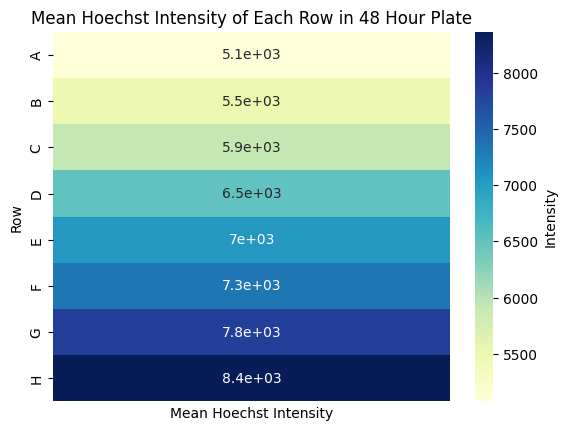

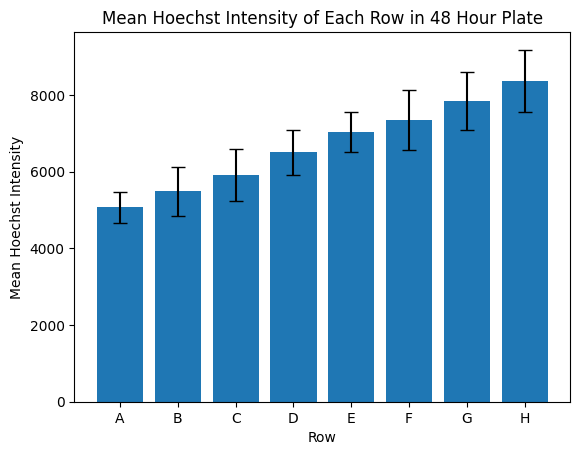

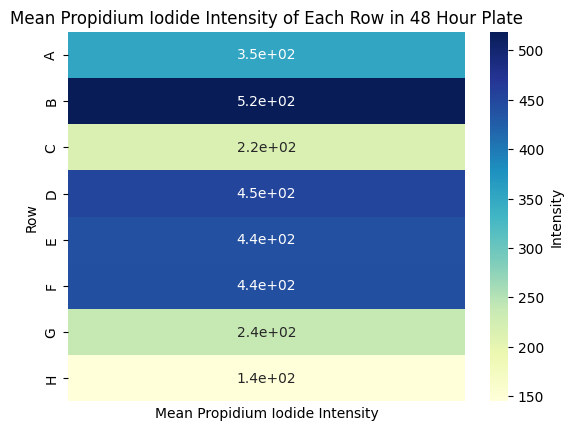

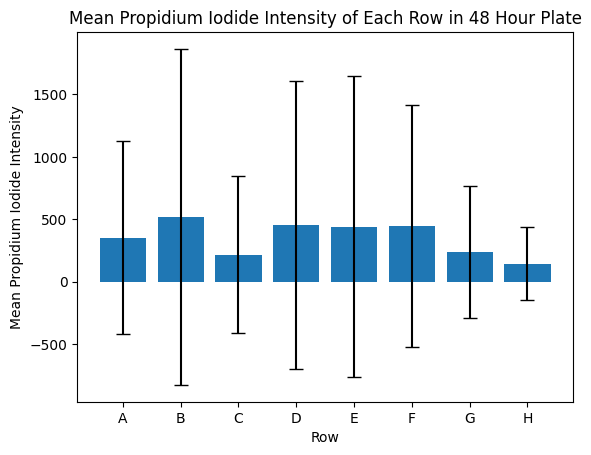

In [ ]:
# 48 hr Hoechst Heat Map
sns.heatmap(df_mean_rows_cols_48_H[['Mean']], annot=True, cmap="YlGnBu", cbar=True, cbar_kws={'label':'Intensity'}, xticklabels=False)

plt.title("Mean Hoechst Intensity of Each Row in 48 Hour Plate")
plt.xlabel("Mean Hoechst Intensity")
plt.ylabel("Row")
plt.show()

# 48 hr Hoechst Bar Plot
plt.bar(df_mean_rows_cols_48_H.index, df_mean_rows_cols_48_H['Mean'], yerr=df_mean_rows_cols_48_H['Std Dev'], capsize=5)

plt.title("Mean Hoechst Intensity of Each Row in 48 Hour Plate")
plt.xlabel("Row")
plt.ylabel('Mean Hoechst Intensity')
plt.show()

# 48 hr PI Heat Map
sns.heatmap(df_mean_rows_cols_48_PI[['Mean']], annot=True, cmap="YlGnBu", cbar=True, cbar_kws={'label':'Intensity'}, xticklabels=False)

plt.title("Mean Propidium Iodide Intensity of Each Row in 48 Hour Plate")
plt.xlabel("Mean Propidium Iodide Intensity")
plt.ylabel("Row")
plt.show()

# 48 hr PI Bar Plot
plt.bar(df_mean_rows_cols_48_PI.index, df_mean_rows_cols_48_PI['Mean'], yerr=df_mean_rows_cols_48_PI['Std Dev'], capsize=5)

plt.title("Mean Propidium Iodide Intensity of Each Row in 48 Hour Plate")
plt.xlabel("Row")
plt.ylabel('Mean Propidium Iodide Intensity')
plt.show()

In [ ]:
# ANOVA of 48 hr Hoechst Intensities
f_stat, p_value = stats.f_oneway(*rows_H_48)

print('Hoescht:')
print(f"P-value: {p_value}")
print()

# ANOVA of 48 hr PI Intensities
f_stat, p_value = stats.f_oneway(*rows_PI_48)

print('PI:')
print(f"P-value: {p_value}")

Hoescht:
P-value: 2.9508943712965886e-23

PI:
P-value: 0.9708936048945472


In [ ]:
df2_venom1 = df_grouped_mean2[df_grouped_mean2['Well'].isin(venom1_index)][['Well', '% Cells Dead']]

df2_venom2 = df_grouped_mean2[df_grouped_mean2['Well'].isin(venom2_index)][['Well', '% Cells Dead']]

In [ ]:
# Calculate Mean Percentage of Cells Dead per Venom 1 Dosage
col_mean2_venom1 = []
for column in venom_columns:
  df_col = df2_venom1[df2_venom1['Well'].isin(["A"+str(column),"C"+str(13-column),"E"+str(column),"G"+str(13-column)])]
  col_mean2_venom1.append(df_col['% Cells Dead'].mean())

# Calculate Mean Percentage of Cells Dead per Venom 2 Dosage
col_mean2_venom2 = []
for column in venom_columns:
  df_col = df2_venom2[df2_venom2['Well'].isin(["B"+str(column),"D"+str(13-column),"F"+str(column),"H"+str(13-column)])]
  col_mean2_venom2.append(df_col['% Cells Dead'].mean())


In [ ]:
# Positive Control Mean
df_pos_48 = df_grouped_mean2[df_grouped_mean2['Well'].isin(pos_control)][['% Cells Dead']]
cells_dead_pos_48 = df_pos_48['% Cells Dead'].mean()
print(cells_dead_pos_48)

# Negative Control Mean
df_neg_48 = df_grouped_mean2[df_grouped_mean2['Well'].isin(neg_control)][['% Cells Dead']]
cells_dead_neg_48 = df_neg_48['% Cells Dead'].mean()
print(cells_dead_neg_48)

25.254196534128628
0.3297980713451396


In [ ]:
df_venom1_plot2 = pd.DataFrame({'X': dosage_venom1, 'Y': col_mean2_venom1})
df_venom1_plot2['X'] = df_venom1_plot2['X'][::-1].values
df_venom1_plot2['Y'] = df_venom1_plot2['Y'][::-1].values

df_venom2_plot2 = pd.DataFrame({'X': dosage_venom2, 'Y': col_mean2_venom2})
df_venom2_plot2['X'] = df_venom2_plot2['X'][::-1].values
df_venom2_plot2['Y'] = df_venom2_plot2['Y'][::-1].values

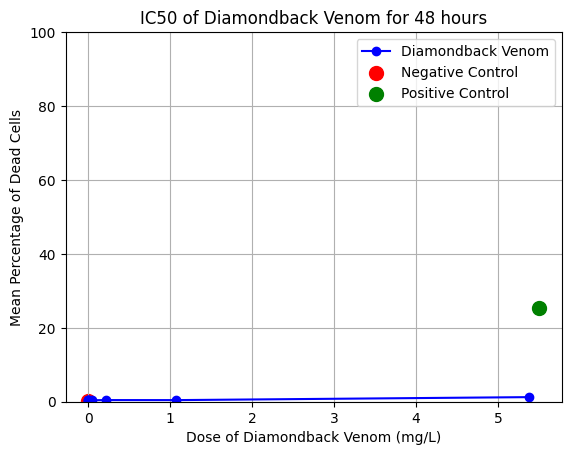

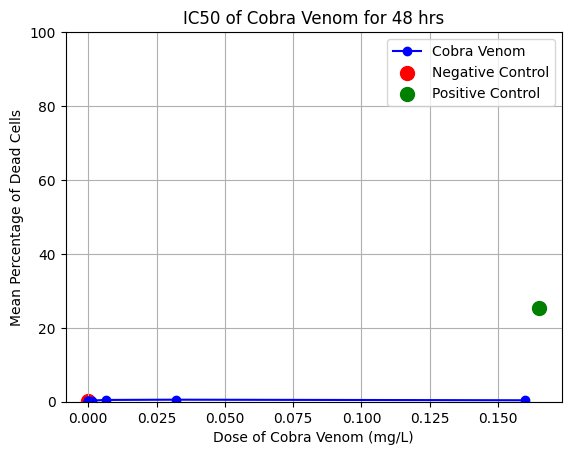

In [ ]:
# IC50 of Venom 1 at 48 hrs
df_venom1_plot2.plot(x='X', y='Y', marker='o', color='blue', label = 'Diamondback Venom')

plt.title('IC50 of Diamondback Venom for 48 hours')
plt.xlabel('Dose of Diamondback Venom (mg/L)')
plt.ylabel('Mean Percentage of Dead Cells')
plt.ylim(0,100)
plt.scatter(0, cells_dead_neg_48, color='red', s=100, label='Negative Control')
plt.scatter(5.5, cells_dead_pos_48, color='green', s=100, label='Positive Control')
plt.grid()
plt.legend()
plt.show()

# IC50 of Venom 2 at 48 hrs
df_venom2_plot2.plot(x='X', y='Y', marker='o', color='blue', label = 'Cobra Venom')

plt.title('IC50 of Cobra Venom for 48 hrs')
plt.xlabel('Dose of Cobra Venom (mg/L)')
plt.ylabel('Mean Percentage of Dead Cells')
plt.ylim(0,100)
plt.scatter(0, cells_dead_neg_48, color='red', s=100, label='Negative Control')
plt.scatter(0.165, cells_dead_pos_48, color='green', s=100, label='Positive Control')
plt.grid()
plt.legend()
plt.show()